# Analisis del Clima para Nieves, Gral. Fco. R. Murguía
Por Guillermo Hernandez

Este documento forma parte de los análisis preeliminares para un modelo predictivo de machine learning sobre los precios de principales granos de producción de la región circundante al pueblo de nieves.

En este documento se analiza el clima local del pueblo de Nieves, General Francisco R. Murguía, Zac. y se toman datos de la estación 32038 a fecha de 13/09/2024, con los datos disponibles a septiembre del 2024, desde 1942, en:
    LATITUD   : 24.00138889 ° 
    LONGITUD  : -103.0194444 ° 
    ALTITUD   : 1913 msnm 
con dirección en la escuela secundaria técnica en mismo Nieves, los datos recopilados son de manera diaria, y las variables recolectadas son: precipitación (mm), temperatura máxima (ºC), temperatura mínima (ºC), y evaporación (mm).

El análisis consta de 3 partes, y muestra datos en bajo nivel para su fácil interpretación, así como algunos gráficos interactivos:

1. Obtención y preparación de datos.

    Los datos son obtenidos de la base de datos climatólogica de página de la [coordinación general del servicio meteorológico nacional](https://smn.conagua.gob.mx/es/climatologia/informacion-climatologica/normales-climatologicas-por-estado?estado=ags). Naturalmente los datos se encuentran en un formato .txt y es necesario llevarlos a un formato que permita su fácil manejo

2. Datos y distribuciones.
    1. Presenta los datos diaros
    2. Presenta las distribuciones estadísticas de los datos

3. Análisis de precipitaciones
    1. Analísis de precipitación histórica por més
    2. Análisis de precipitación histórica por año

4. Análisis de temperaturas y evaporación
    1. Análisis de temperaturas y evaporación mensual histórico
    2. Análisis de temperaturas y evaporación anual histórico



## Obtención y preparación de los datos

Preparación e importación de dependencias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import calendar

Hagamos el procesado, limpiado y arreglo de datos

In [2]:
daily_nieves = pd.read_csv('weather_data/daily/nieves.txt', skiprows=25, sep=r'\s+',names=['date','rain','evap','t_max','t_min'], index_col='date')

daily_nieves.index = pd.to_datetime(daily_nieves.index)
daily_nieves.replace('NULO',np.nan, inplace=True)
daily_nieves = daily_nieves.astype(float)
daily_nieves.describe()


rain          evap         t_max         t_min
count  28578.000000  10173.000000  27487.000000  27487.000000
mean       1.046170      6.186919     25.381457     11.385444
std        4.482912      2.810517      5.285413      6.226088
min        0.000000      0.100000     -7.500000    -10.500000
25%        0.000000      4.100000     22.000000      7.000000
50%        0.000000      5.850000     26.000000     12.000000
75%        0.000000      8.100000     29.000000     15.000000
max      145.600000     18.000000     39.000000     28.000000

In [3]:
# Se tomarán únicamente datos a partir del año 1945
data_nieves = daily_nieves.loc['1945-03-06':] #'1945-03-06'

## Datos y distribuciones

### Datos totales

Grafico Histórico Anual de variables climáticas registradas

In [4]:
rain_plot = px.line(data_nieves)
rain_plot

### Distribuciones estadísticas

Distribución de las cantidades de veces que aparacen una variable (Histograma)

Dias Totales: 27777


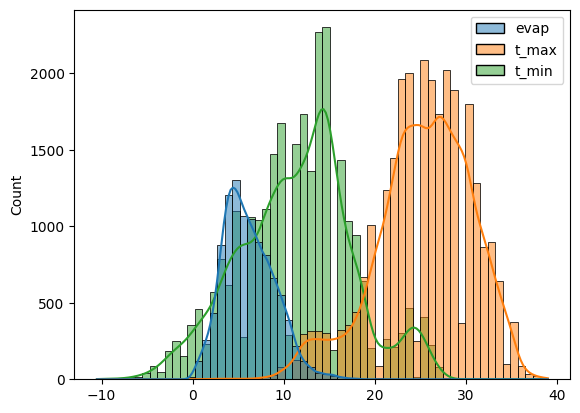

In [5]:
sns.histplot(data_nieves[['evap','t_max','t_min']], kde=True)
print('Dias Totales:',len(data_nieves))

Al parecer existen anomalias de registro en los 11, 17, 21, 26, 30, y 36 grados.
No se a que se pueda deber estos errores de registro, posiblemente a un error de escala de la máquina que hace el registro, dado que muestra una precisión de $\pm 0.5$ grados

Distribución de los mm de lluvia en el tiempo registrado (en escala logaritmica), podemos ver que la gran mayoría de los días en que hay lluvias ($x > 10^0 mm$) días se tienen lloviznas de hasta 1 mm ($ 10^0 < x < 10^1 mm$) y más allá de eso los días de lluvia son contados

<Axes: ylabel='Count'>

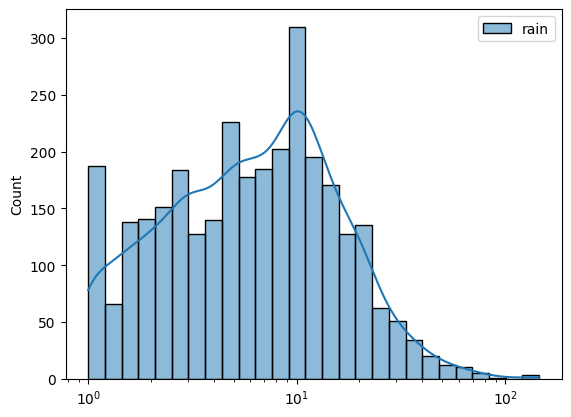

In [6]:
years_counted = len(data_nieves) / 365 - 1 # Not counted 2008

sns.histplot(data_nieves[data_nieves['rain']>=1].loc[:,['rain']], log_scale=True, kde=True)

In [7]:
# Calculus of days of rain in the year
rain_data = data_nieves[data_nieves['rain']>=1].loc[:,['rain']]
light_rain_data = rain_data[(rain_data['rain'] >=1) & (rain_data['rain']<4)]
high_rain_data = rain_data[(rain_data['rain'] > 4) & (rain_data['rain']<14)]
anomalous_rain_data = rain_data[rain_data['rain']>14]

days_of_rain = len(rain_data) / years_counted
days_of_light_rain = len(light_rain_data) / years_counted
days_of_high_rain = len(high_rain_data) / years_counted
days_of_anomalous_rain = len(anomalous_rain_data) /years_counted

print('Años totales:', years_counted)
print('Dias promedio de lluvia al año:', days_of_rain)
print('Dias promedio de lluvia ligera al año:',days_of_light_rain)
print('Dias promedio de lluvia fuerte al año:', days_of_high_rain)
print('Dias promedio de lluvia inusualmente alta:', days_of_anomalous_rain)


Años totales: 75.1013698630137
Dias promedio de lluvia al año: 40.75824456442434
Dias promedio de lluvia ligera al año: 13.62158908507223
Dias promedio de lluvia fuerte al año: 18.188749452794397
Dias promedio de lluvia inusualmente alta: 7.563111046257114


<Axes: >

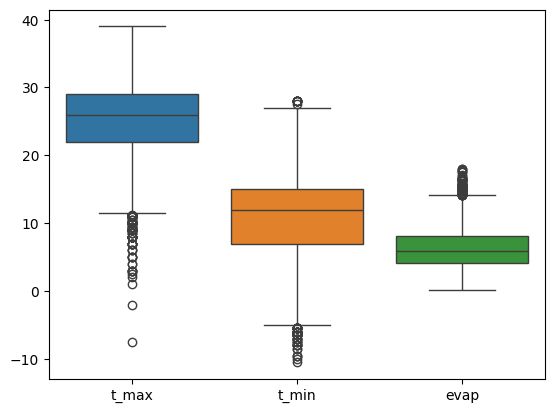

In [8]:
sns.boxplot(data_nieves[['t_max','t_min','evap']])

In [9]:
print(data_nieves.quantile(0.9))
print(data_nieves.quantile(0.1))

rain      1.5
evap     10.0
t_max    32.0
t_min    19.0
Name: 0.9, dtype: float64
rain      0.0
evap      2.9
t_max    19.0
t_min     3.0
Name: 0.1, dtype: float64


Como podemos ver, las temperaturas máximas registradas en nieves no sulen pasar los 32 grados, ni suelen estar por debajo de los 19 grados, mientras que las temperaturas minimas no suelen pasar de 19 ni estar por debajo de los 3 grados, y alrededor del 90% de las lluvias son de 1.5 mm o menos 

## Análisis de Precipitaciones

#### Analisis de precipitación histórica por mes


##### Preparación de datos
Podemos ver que los meses en los que llueve más son:
* Junio
* Julio
* Agosto
* Septiembre

In [10]:


data_nieves['date'] = data_nieves.index
data_nieves['month'] = data_nieves['date'].dt.month
data_nieves['year'] = data_nieves['date'].dt.year
# data_nieves['day'] = data_nieves['date'].dt.day
data_nieves = data_nieves.drop(columns='date')

monthly_stats = data_nieves.groupby('month')[['rain','evap','t_max','t_min']].agg('mean')
#monthly_stats['rain_ds'] = data_nieves.groupby('month')[['rain','evap','t_max','t_min']].agg('std')
# order the months

yearly_stats_sum = data_nieves.groupby('year')[['rain','evap','t_max','t_min']].agg('sum')
yearly_stats_mean = data_nieves[data_nieves['rain']>0].groupby('year')[['rain','evap','t_max','t_min']].agg('mean')
historic_month_stats_sum = data_nieves.groupby(['month', 'year'])[['rain','evap','t_max','t_min']].agg('sum')
historic_month_stats_mean = data_nieves[data_nieves['rain']>0].groupby(['month', 'year'])[['rain','evap','t_max','t_min']].agg('mean')

C:\Users\guill\AppData\Local\Temp\ipykernel_23852\2048303213.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\guill\AppData\Local\Temp\ipykernel_23852\2048303213.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\guill\AppData\Local\Temp\ipykernel_23852\2048303213.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [11]:
monthly_stats

rain      evap      t_max      t_min
month                                          
1      0.305590  4.026190  19.324863   5.921766
2      0.201195  5.478698  21.088657   7.014509
3      0.229449  7.470079  24.449278   9.125361
4      0.128280  8.856570  27.626200  11.762351
5      0.469613  9.280201  30.246424  14.528475
6      1.935844  8.043788  30.025889  16.050193
7      2.373776  6.588970  28.163388  15.389572
8      2.646562  6.081366  27.860903  15.228705
9      2.482668  5.001439  26.486162  14.404401
10     0.949851  4.894843  25.336404  11.672896
11     0.305984  4.408248  23.084698   8.739813
12     0.310466  3.642096  20.377224   6.347394

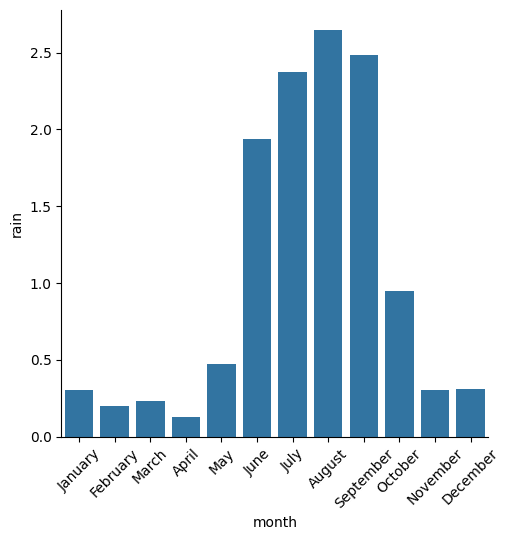

In [12]:
monthly_stats_graph = sns.catplot(monthly_stats, x='month', y='rain', kind='bar')
monthly_stats_graph.set_xticklabels(labels=list(calendar.month_name[1:]),rotation=45)

##### Gráfico Mensual Historico de precipitaciones promedio

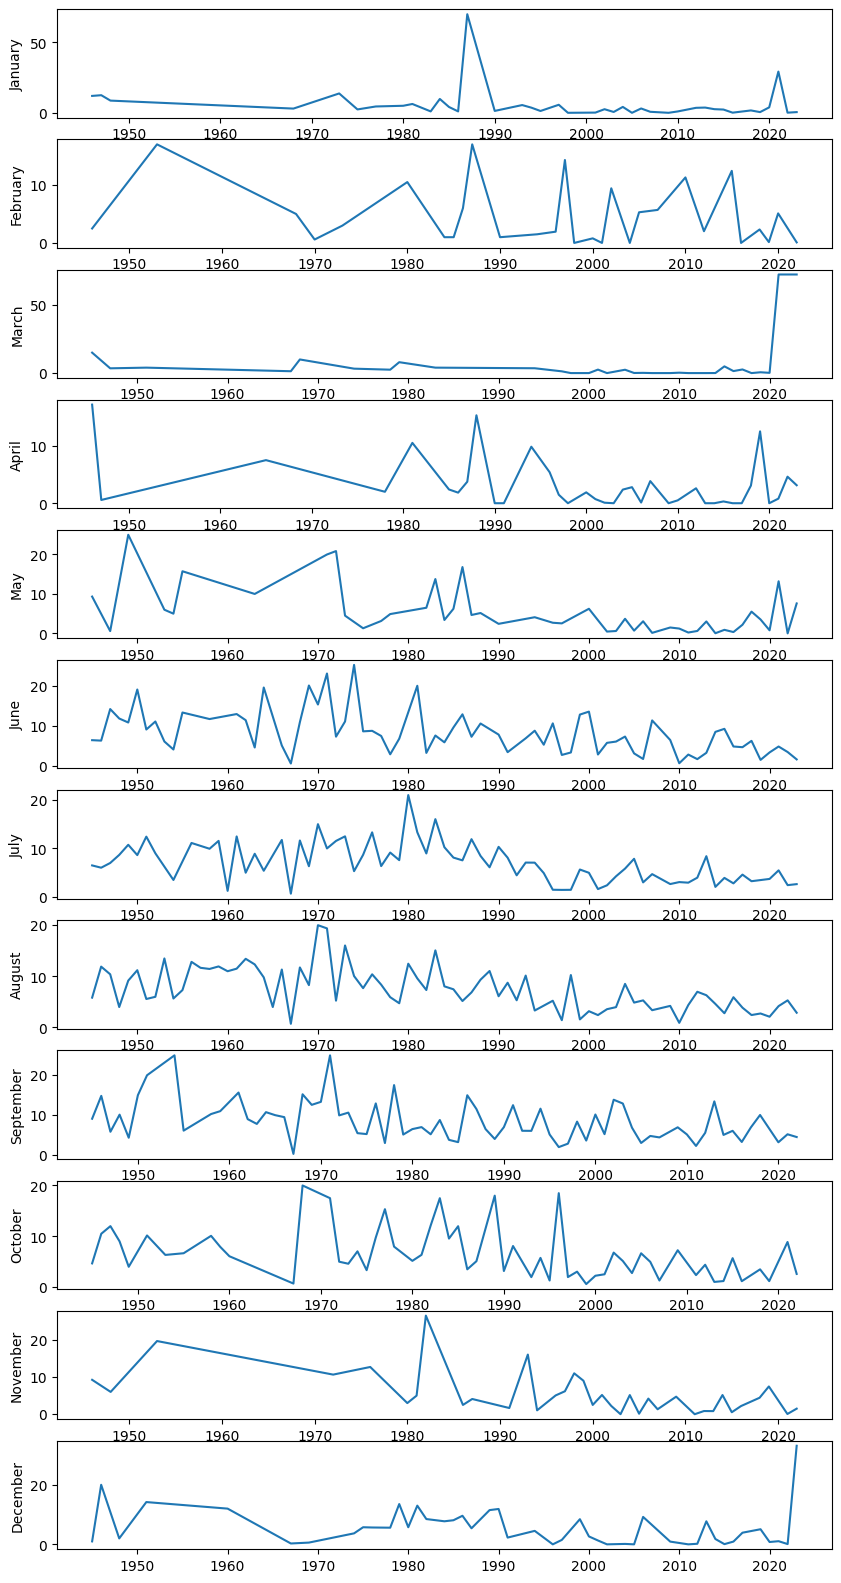

In [13]:
# Promedio
fig, ax = plt.subplots(12,1, figsize = (10,20))
for month in range(1,13):
    ax[month-1].plot(historic_month_stats_mean['rain'].loc[month])
    ax[month-1].set_ylabel(calendar.month_name[1:][month-1])

##### Gráfico Mensual Historico de precipitaciones acumuladas

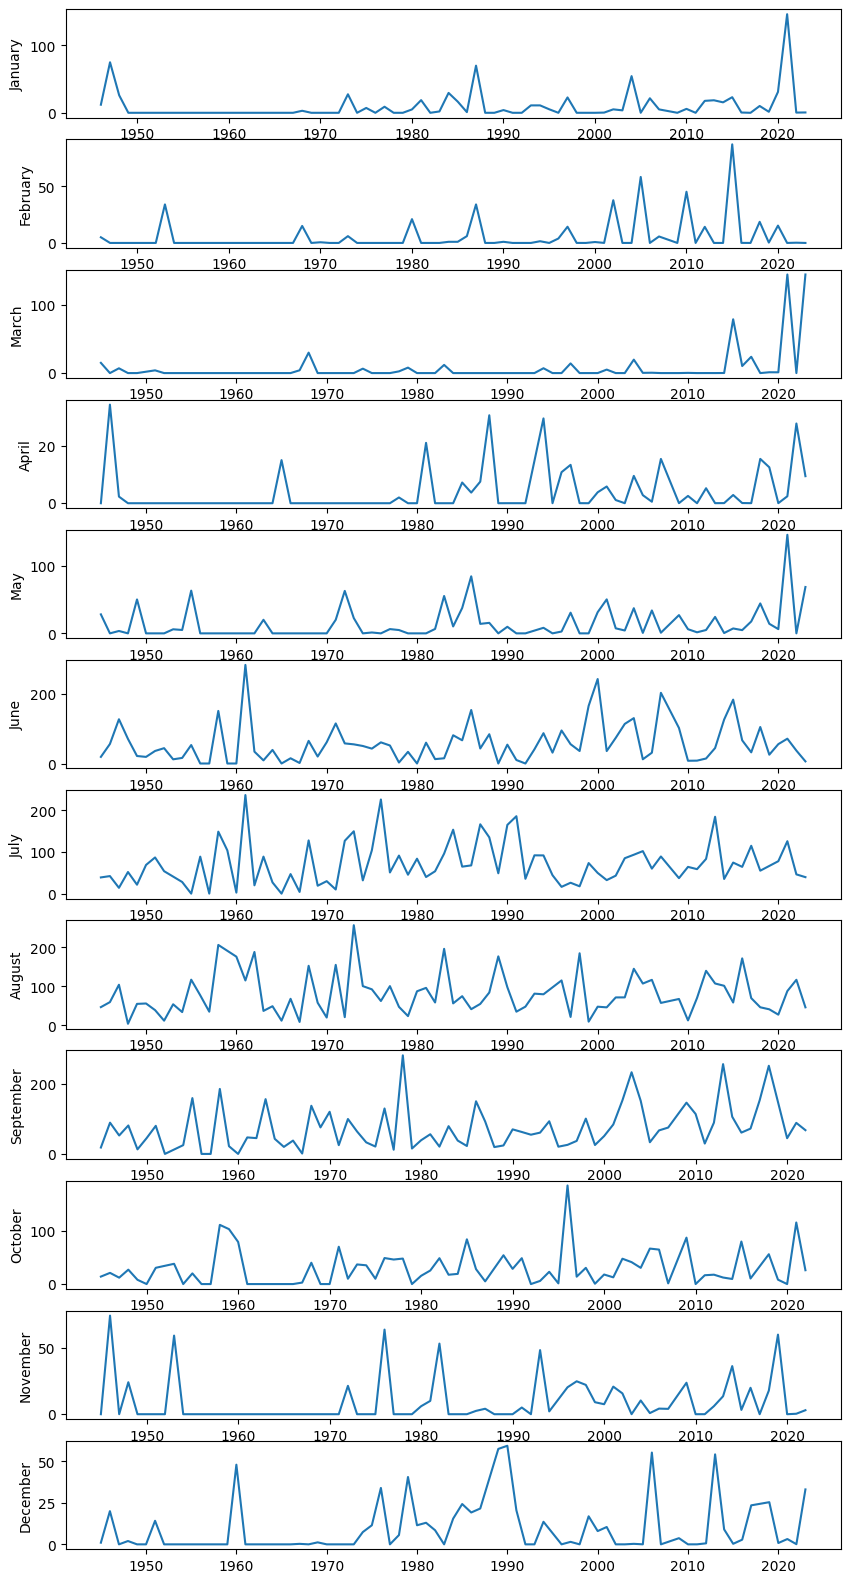

In [14]:
# Promedio
fig, ax = plt.subplots(12,1, figsize = (10,20))
for month in range(1,13):
    ax[month-1].plot(historic_month_stats_sum['rain'].loc[month])
    ax[month-1].set_ylabel(calendar.month_name[1:][month-1])

#### Análisis de precipitación histórica por año

In [15]:
# LLuvia total acumulada
px.line(yearly_stats_sum,y='rain', title='LLuvia total Acumulada por año')

In [16]:
# Lluvia promedio en días de lluvia
px.line(yearly_stats_mean, y='rain', title='Lluvia promedio diaria por año')

In [17]:
df_days_of_rain = data_nieves[data_nieves['rain']>0].groupby('year').count()
px.line(df_days_of_rain, y='rain', title='Dias de lluvia por año')

## Análisis de Temperaturas y Evaporación

C:\Users\guill\AppData\Local\Temp\ipykernel_23852\1130660323.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



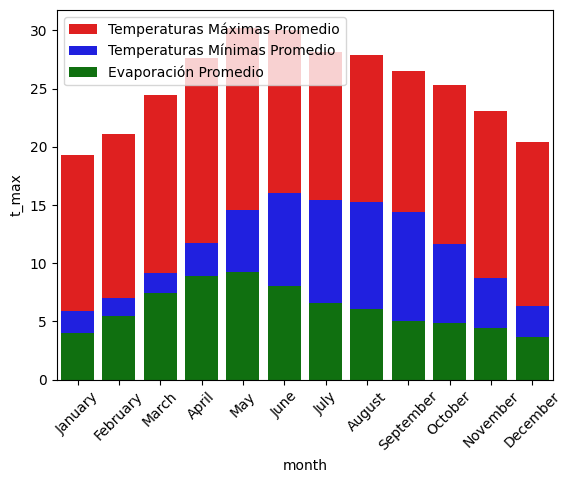

In [18]:
f, axe = plt.subplots()
sns.barplot(monthly_stats, x='month', y='t_max', label = 'Temperaturas Máximas Promedio', color='red', ax = axe)
sns.barplot(monthly_stats, x='month', y='t_min', label = 'Temperaturas Mínimas Promedio', color='blue', ax = axe)
sns.barplot(monthly_stats, x='month', y='evap', label = 'Evaporación Promedio', color = 'green',ax = axe)
tick=axe.set_xticklabels(calendar.month_name[1:], rotation=45)

### Análisis de temperaturas y evaporación mensual histórica

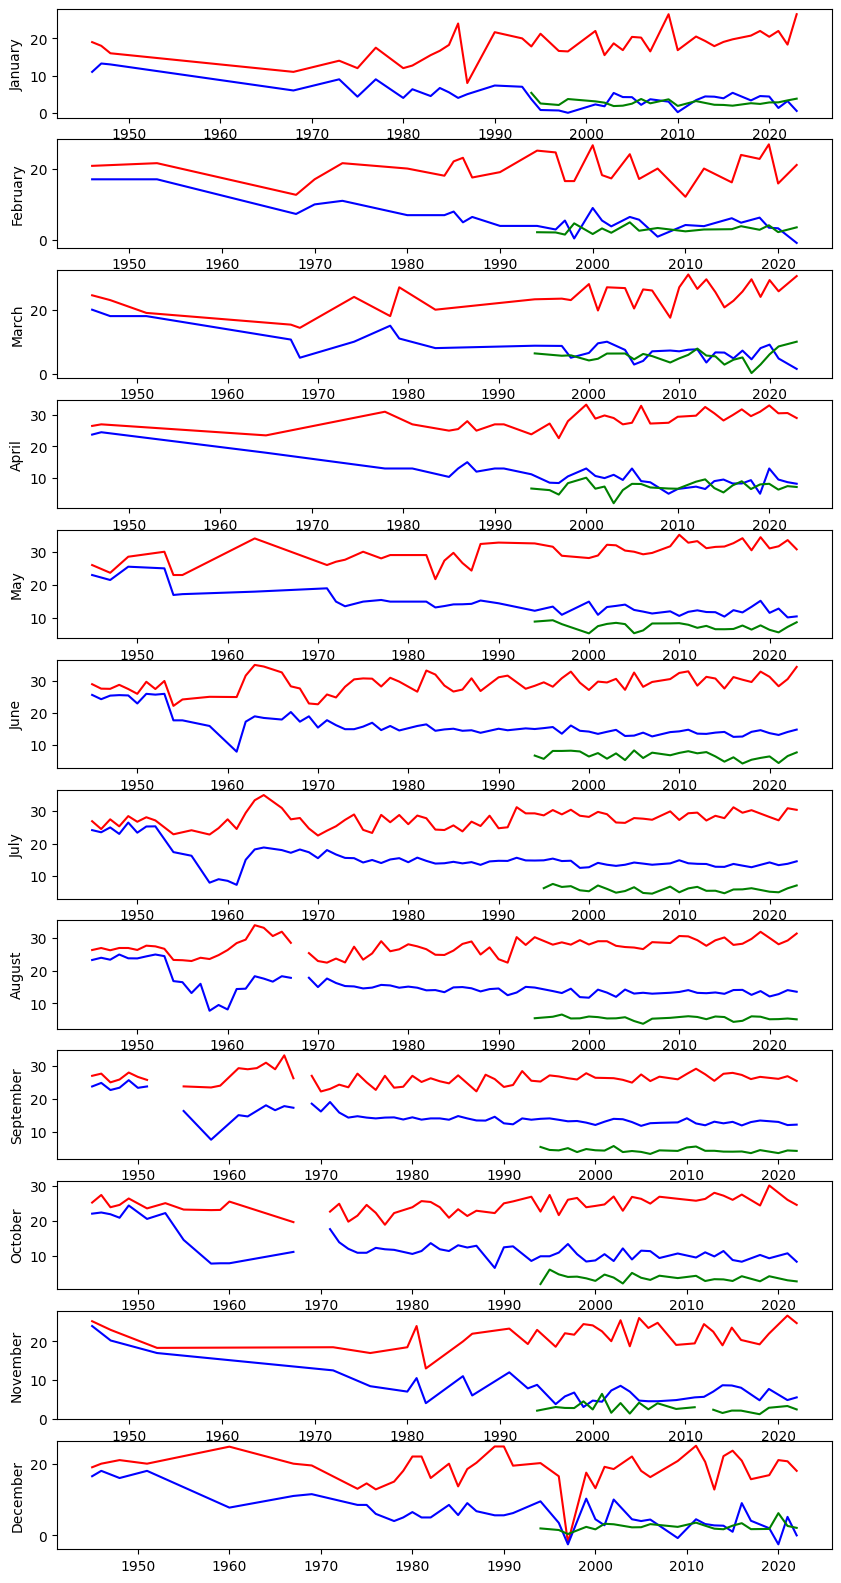

In [19]:
# Promedio
fig, ax = plt.subplots(12,1, figsize = (10,20))
for month in range(1,13):
    ax[month-1].plot(historic_month_stats_mean['t_max'].loc[month], color ='red')
    ax[month-1].plot(historic_month_stats_mean['t_min'].loc[month], color = 'blue')
    ax[month-1].plot(historic_month_stats_mean['evap'].loc[month], color = 'green')
    ax[month-1].set_ylabel(calendar.month_name[1:][month-1])

### Análisis de temperaturas y evaporación anual histórica promedio

In [20]:
# LLuvia total acumulada
px.line(yearly_stats_mean[['t_max','t_min','evap']], title='Temperatura anual promedio y evaporación')

In [22]:
data_nieves.dropna().to_csv('nieves_to_predict.csv')